In [10]:
import gzip
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

IMAGE_SIZE = 28

def extract_data(filename, num_images):
    print('Extracting', filename)

    with gzip.open(filename) as bytestream:
        bytestream.read(16)
        buf = bytestream.read(IMAGE_SIZE * IMAGE_SIZE * num_images)
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
        data = data.reshape(num_images, IMAGE_SIZE, IMAGE_SIZE, 1)
        return data


def extract_labels(filename, num_images):
    print('Extracting', filename)
    with gzip.open(filename) as bytestream:
        bytestream.read(8)
        buf = bytestream.read(1 * num_images)
        labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
        return labels


# define step function
def step_function(num):
    for z in np.arange(len(num)):
        if num[z] >= 0:
            num[z] = 1
        else:
            num[z] = 0
    return num


# define  the  output  from  the  largest  value
def decide_out(array_v):
    max_index = 0
    temp = array_v[0]
    for z in np.arange(len(array_v)):
        if array_v[z] > temp:
            temp = array_v[z]
            max_index = z
    return max_index


# desired out as array
def get_desired_array(desired_number):
    dummy = np.zeros(10).reshape(10, 1)
    dummy[desired_number] = 1
    return dummy


# function to detect inequality in 2 arrays
def check_exact(a, b):
    err = 0
    for i in range(0, 10):
        for j in range(0, 784):
            if a[i][j] != b[i][j]:
                err = err + 1
    return err


Extracting ./train-images-idx3-ubyte.gz
Extracting ./train-labels-idx1-ubyte.gz
Extracting ./t10k-images-idx3-ubyte.gz
Extracting ./t10k-labels-idx1-ubyte.gz
epoch#  1
ratio:  0.9021333333333333
[54128]
epoch#  2
ratio:  0.15336666666666668
[54128, 9202]
epoch#  3
ratio:  0.17405
[54128, 9202, 10443]
epoch#  4
ratio:  0.16165
[54128, 9202, 10443, 9699]
epoch#  5
ratio:  0.1538
[54128, 9202, 10443, 9699, 9228]
epoch#  6
ratio:  0.15808333333333333
[54128, 9202, 10443, 9699, 9228, 9485]
epoch#  7
ratio:  0.1598
[54128, 9202, 10443, 9699, 9228, 9485, 9588]
epoch#  8
ratio:  0.15328333333333333
[54128, 9202, 10443, 9699, 9228, 9485, 9588, 9197]
epoch#  9
ratio:  0.15541666666666668
[54128, 9202, 10443, 9699, 9228, 9485, 9588, 9197, 9325]
epoch#  10
ratio:  0.16111666666666666
[54128, 9202, 10443, 9699, 9228, 9485, 9588, 9197, 9325, 9667]
epoch#  11
ratio:  0.16086666666666666
[54128, 9202, 10443, 9699, 9228, 9485, 9588, 9197, 9325, 9667, 9652]
epoch#  12
ratio:  0.15385
[54128, 9202, 10443

epoch#  47
ratio:  0.13633333333333333
[54128, 9202, 10443, 9699, 9228, 9485, 9588, 9197, 9325, 9667, 9652, 9231, 10067, 9924, 10027, 9612, 9234, 9100, 8676, 8893, 8499, 8892, 8560, 10167, 9165, 9542, 8805, 10368, 9110, 10244, 9497, 9193, 9879, 10449, 8625, 8623, 9939, 9822, 9107, 8935, 9523, 10121, 9303, 9927, 8754, 8167, 8180]
epoch#  48
ratio:  0.16166666666666665
[54128, 9202, 10443, 9699, 9228, 9485, 9588, 9197, 9325, 9667, 9652, 9231, 10067, 9924, 10027, 9612, 9234, 9100, 8676, 8893, 8499, 8892, 8560, 10167, 9165, 9542, 8805, 10368, 9110, 10244, 9497, 9193, 9879, 10449, 8625, 8623, 9939, 9822, 9107, 8935, 9523, 10121, 9303, 9927, 8754, 8167, 8180, 9700]
epoch#  49
ratio:  0.15856666666666666
[54128, 9202, 10443, 9699, 9228, 9485, 9588, 9197, 9325, 9667, 9652, 9231, 10067, 9924, 10027, 9612, 9234, 9100, 8676, 8893, 8499, 8892, 8560, 10167, 9165, 9542, 8805, 10368, 9110, 10244, 9497, 9193, 9879, 10449, 8625, 8623, 9939, 9822, 9107, 8935, 9523, 10121, 9303, 9927, 8754, 8167, 8180, 9

epoch#  69
ratio:  0.16605
[54128, 9202, 10443, 9699, 9228, 9485, 9588, 9197, 9325, 9667, 9652, 9231, 10067, 9924, 10027, 9612, 9234, 9100, 8676, 8893, 8499, 8892, 8560, 10167, 9165, 9542, 8805, 10368, 9110, 10244, 9497, 9193, 9879, 10449, 8625, 8623, 9939, 9822, 9107, 8935, 9523, 10121, 9303, 9927, 8754, 8167, 8180, 9700, 9514, 8960, 8223, 7859, 9285, 9770, 8995, 9471, 8041, 8502, 8901, 8868, 9669, 8669, 8813, 9148, 8321, 7832, 7820, 8003, 9963]
epoch#  70
ratio:  0.12666666666666668
[54128, 9202, 10443, 9699, 9228, 9485, 9588, 9197, 9325, 9667, 9652, 9231, 10067, 9924, 10027, 9612, 9234, 9100, 8676, 8893, 8499, 8892, 8560, 10167, 9165, 9542, 8805, 10368, 9110, 10244, 9497, 9193, 9879, 10449, 8625, 8623, 9939, 9822, 9107, 8935, 9523, 10121, 9303, 9927, 8754, 8167, 8180, 9700, 9514, 8960, 8223, 7859, 9285, 9770, 8995, 9471, 8041, 8502, 8901, 8868, 9669, 8669, 8813, 9148, 8321, 7832, 7820, 8003, 9963, 7600]


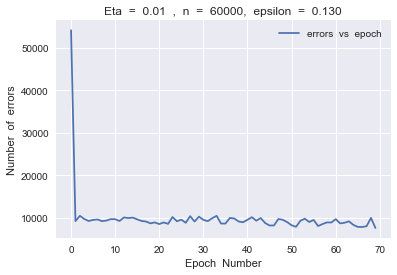

miss  classified  samples  =1544
Digit classification accuracy using PTA:  0.8456


In [11]:
def multicategotry_pta():
    
    train_data_filename = './train-images-idx3-ubyte.gz'
    train_labels_filename = './train-labels-idx1-ubyte.gz'
    test_data_filename = './t10k-images-idx3-ubyte.gz'
    test_labels_filename = './t10k-labels-idx1-ubyte.gz'

    # Extract  it  into  np  arrays.
    train_data = extract_data(train_data_filename, 60000)
    desired_output = extract_labels(train_labels_filename, 60000)
    test_data = extract_data(test_data_filename, 10000)
    test_labels = extract_labels(test_labels_filename, 10000)
    
    
    # 3.1
    w = np.random.uniform(-1, 1, [10, 784])
    elements = 60000  
    epsilon = 0.130
    eta = 0.01
    epoch = 0
    errors = []
    actual_out = []
    not_good_ratio = True
    
        # 3.2
    while not_good_ratio:
        # 3.1.1
        errors.append(0)
        for i in range(0, elements):
            # 3.1.1.1
            x = np.reshape(train_data[i][:, :, 0], (784, 1))  
            # Single Sample
            v = np.dot(w, x)  
            actual_out.append(decide_out(v))  
            if actual_out[i] != desired_output[i]:
                errors[epoch] += 1
        actual_out = []
        
        w1 = w
        epoch = epoch + 1
        for i in range(0, elements):  # update  weights
            x = np.reshape(train_data[i][:, :, 0], (784, 1))
            v = np.dot(w, x)
            a = get_desired_array(desired_output[i])  # (10, 1)
            b = step_function(v)  # (10, 1)
            o = (a - b)
            c = eta * o
            k = np.add(w, np.dot(c, x.T))  # (10,1)*(1,  784)=(10,  784)
            w = k
        # ------------------------------------------------------------
        w2 = w
        # print("check  exact:  {}".format(check_exact(w1,  w2)))
        ratio = errors[epoch - 1] / elements
        print("epoch# ", epoch)
        print("ratio:  {}".format(ratio))
        print(errors)
        if ratio <= epsilon:
            not_good_ratio = False

    plt.figure(1)
    sns.set()
    y = errors
    N = len(y)
    x = range(N)
    plt.plot(x, y, label='errors  vs  epoch')
    plt.ylabel('Number  of  errors')
    plt.xlabel('Epoch  Number')
    plt.title('Eta  =  0.01  ,  n  =  60000,  epsilon  =  0.130')
    plt.legend()
    plt.show()


    err = 0
    actual_out = []
    for i in range(0, 10000):
        
        x = np.reshape(test_data[i][:, :, 0],(784, 1))  # Single  Sample
        v = np.dot(w,  x)  # v  =  [v0  v1  v2  ....  v9]
        
        actual_out.append(decide_out(v))
        
        if actual_out[i] != test_labels[i]:
            err = err + 1
    print("miss  classified  samples  ={}".format(err))
    accuracy = (test_labels.size - err)/test_labels.size
    print("Digit classification accuracy using PTA: ", accuracy)    


multicategotry_pta()